In [1]:
#importing needed libraries for analysis
import pandas as pd 
import os 
import matplotlib.pyplot as plt

#putting the csv file into a dataframe to be read by pandas
df = pd.read_csv('UT_Listings.csv')

#previewing first 5 lines of data. As you can see, the data needs to be cleaned up a bit before analysis.
df.head()

,Price,Address,Details,Link
0,"$150,000",Plymouth,"\n3 BEDS 2 BATHS \n1,866 SQFT\n",/property_listing/1801948/mlsname/WFRMLS/ltype...
1,"$150,000",CAMELOT MOBILE PARK | North Salt Lake,"\n3 BEDS 2 BATHS \n1,500 SQFT\n",/property_listing/1825267/mlsname/WFRMLS/ltype...
2,"$150,000",Taylorsville,"\n4 BEDS 2 BATHS \n1,344 SQFT\n",/property_listing/1822772/mlsname/WFRMLS/ltype...
3,"$156,200",WILKERSON | Roosevelt,"\n4 BEDS 2 BATHS \n1,440 SQFT\n",/property_listing/1824246/mlsname/WFRMLS/ltype...
4,"$159,000",Washington,\n1 BEDS 1 BATHS \n432 SQFT\n,/property_listing/1818973/mlsname/WFRMLS/ltype...


In [2]:
#first, we are going to check for null values using the below code

nan_df = df[df.isna().any(axis=1)]
nan_df.head(50)

#as you can see, there is only 1 null value which was an advertising block from the site that we scraped.

,Price,Address,Details,Link
5,"$???,???",NaN,Thinking about selling?,/fine/real/estate/marketeval/myid83735465


In [3]:
#because the only Nan value was in index 5, below we are dropping the 5th index. 
#You can see that it is no longer in our dataframe
df = df.drop(df.index[5], axis = 0)
df.head(10)

,Price,Address,Details,Link
0,"$150,000",Plymouth,"\n3 BEDS 2 BATHS \n1,866 SQFT\n",/property_listing/1801948/mlsname/WFRMLS/ltype...
1,"$150,000",CAMELOT MOBILE PARK | North Salt Lake,"\n3 BEDS 2 BATHS \n1,500 SQFT\n",/property_listing/1825267/mlsname/WFRMLS/ltype...
2,"$150,000",Taylorsville,"\n4 BEDS 2 BATHS \n1,344 SQFT\n",/property_listing/1822772/mlsname/WFRMLS/ltype...
3,"$156,200",WILKERSON | Roosevelt,"\n4 BEDS 2 BATHS \n1,440 SQFT\n",/property_listing/1824246/mlsname/WFRMLS/ltype...
4,"$159,000",Washington,\n1 BEDS 1 BATHS \n432 SQFT\n,/property_listing/1818973/mlsname/WFRMLS/ltype...
6,"$159,000",ACORD LAKE | Salina,\n1 BEDS 1 BATHS \n240 SQFT\n,/property_listing/1811487/mlsname/WFRMLS/ltype...
7,"$159,900",MAJESTIC MEADOWS | Taylorsville,"\n3 BEDS 2 BATHS \n1,386 SQFT\n",/property_listing/1814321/mlsname/WFRMLS/ltype...
8,"$159,900",ASPEN HILLS | Fairview,\n0 BEDS 1 BATHS \n800 SQFT\n,/property_listing/1814381/mlsname/WFRMLS/ltype...
9,"$159,900",MYTON | Myton,"\n2 BEDS 1 BATHS \n1,050 SQFT\n",/property_listing/1809578/mlsname/WFRMLS/ltype...
10,"$159,900",Malad City,\n2 BEDS 1 BATHS \n734 SQFT\n,/property_listing/1811572/mlsname/WFRMLS/ltype...


In [4]:
#we previously had a $ in the Price column. This code removes the $ sign so that the column can be converted to an integer later on. 
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Details'] = df['Details'].str.replace(',', '')
df.head()

C:\Users\trevp\AppData\Local\Temp\ipykernel_8556\912857771.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


,Price,Address,Details,Link
0,150000,Plymouth,\n3 BEDS 2 BATHS \n1866 SQFT\n,/property_listing/1801948/mlsname/WFRMLS/ltype...
1,150000,CAMELOT MOBILE PARK | North Salt Lake,\n3 BEDS 2 BATHS \n1500 SQFT\n,/property_listing/1825267/mlsname/WFRMLS/ltype...
2,150000,Taylorsville,\n4 BEDS 2 BATHS \n1344 SQFT\n,/property_listing/1822772/mlsname/WFRMLS/ltype...
3,156200,WILKERSON | Roosevelt,\n4 BEDS 2 BATHS \n1440 SQFT\n,/property_listing/1824246/mlsname/WFRMLS/ltype...
4,159000,Washington,\n1 BEDS 1 BATHS \n432 SQFT\n,/property_listing/1818973/mlsname/WFRMLS/ltype...


In [5]:
#Next - we need to create a new column representing just the city. As you can see from the data in the Address column, it
#also includes the neighborhood. This function below splits just the city and returns that to a new City column.
def get_city(address):
    return address.split('|')[-1]
    

df['City'] = df['Address'].apply(lambda x: f"{get_city(x)}")
df.head()

,Price,Address,Details,Link,City
0,150000,Plymouth,\n3 BEDS 2 BATHS \n1866 SQFT\n,/property_listing/1801948/mlsname/WFRMLS/ltype...,Plymouth
1,150000,CAMELOT MOBILE PARK | North Salt Lake,\n3 BEDS 2 BATHS \n1500 SQFT\n,/property_listing/1825267/mlsname/WFRMLS/ltype...,North Salt Lake
2,150000,Taylorsville,\n4 BEDS 2 BATHS \n1344 SQFT\n,/property_listing/1822772/mlsname/WFRMLS/ltype...,Taylorsville
3,156200,WILKERSON | Roosevelt,\n4 BEDS 2 BATHS \n1440 SQFT\n,/property_listing/1824246/mlsname/WFRMLS/ltype...,Roosevelt
4,159000,Washington,\n1 BEDS 1 BATHS \n432 SQFT\n,/property_listing/1818973/mlsname/WFRMLS/ltype...,Washington


In [6]:
#we are taking care of a lot in this block. 
#First - seperating all info from the details columns (bed, bath, sqft) into their own columns.
#Next - dropping the address and details columns altogether as we won't need them moving forward.

def get_beds(details):
    return details.split()[0]
def get_baths(details):
    return details.split()[2]
def get_sqft(details):
    return details.split()[-2]
    

df['Beds'] = df['Details'].apply(lambda x: f"{get_beds(x)}")
df['Baths'] = df['Details'].apply(lambda x: f"{get_baths(x)}")
df['Sqft'] = df['Details'].apply(lambda x: f"{get_sqft(x)}")

df.drop(df.columns[[1, 2]], axis=1, inplace=True)

df.head(10)

,Price,Link,City,Beds,Baths,Sqft
0,150000,/property_listing/1801948/mlsname/WFRMLS/ltype...,Plymouth,3,2,1866
1,150000,/property_listing/1825267/mlsname/WFRMLS/ltype...,North Salt Lake,3,2,1500
2,150000,/property_listing/1822772/mlsname/WFRMLS/ltype...,Taylorsville,4,2,1344
3,156200,/property_listing/1824246/mlsname/WFRMLS/ltype...,Roosevelt,4,2,1440
4,159000,/property_listing/1818973/mlsname/WFRMLS/ltype...,Washington,1,1,432
6,159000,/property_listing/1811487/mlsname/WFRMLS/ltype...,Salina,1,1,240
7,159900,/property_listing/1814321/mlsname/WFRMLS/ltype...,Taylorsville,3,2,1386
8,159900,/property_listing/1814381/mlsname/WFRMLS/ltype...,Fairview,0,1,800
9,159900,/property_listing/1809578/mlsname/WFRMLS/ltype...,Myton,2,1,1050
10,159900,/property_listing/1811572/mlsname/WFRMLS/ltype...,Malad City,2,1,734


In [7]:
#here we are adding the https://www.dhomes4u.com to the link in order to complete it.
#Also - the initial Link column has been dropped.
df['Link2'] = "https://www.dhomes4u.com" + df['Link']
df.drop(df.columns[[1]],axis=1,inplace=True)
df.head()

,Price,City,Beds,Baths,Sqft,Link2
0,150000,Plymouth,3,2,1866,https://www.dhomes4u.com/property_listing/1801...
1,150000,North Salt Lake,3,2,1500,https://www.dhomes4u.com/property_listing/1825...
2,150000,Taylorsville,4,2,1344,https://www.dhomes4u.com/property_listing/1822...
3,156200,Roosevelt,4,2,1440,https://www.dhomes4u.com/property_listing/1824...
4,159000,Washington,1,1,432,https://www.dhomes4u.com/property_listing/1818...


In [8]:
#saving the clean file
df.to_csv('UT_Listings_Clean.csv', index=False)

In [9]:
#making sure that we aren't missing any info
import numpy as np
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}: {:.2f}%'.format(col, pct_missing))

Price: 0.00%
City: 0.00%
Beds: 0.00%
Baths: 0.00%
Sqft: 0.00%
Link2: 0.00%


In [10]:
#needing to adjust the data types before analysis
print(df.dtypes)

Price    object
City     object
Beds     object
Baths    object
Sqft     object
Link2    object
dtype: object


In [11]:
#updating the value types here.
df = df.astype({'Price': 'int32', 'Beds': 'int32', 'Baths': 'int32', 'Sqft': 'int32', 'City': 'string'})

df.dtypes

Price     int32
City     string
Beds      int32
Baths     int32
Sqft      int32
Link2    object
dtype: object

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

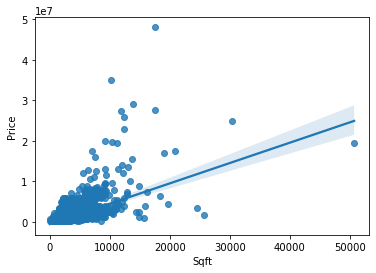

In [12]:
#strong correlation between sqft and price. 
import seaborn as sns

sns.regplot(x = 'Sqft', y = 'Price', data = df)

<AxesSubplot:>

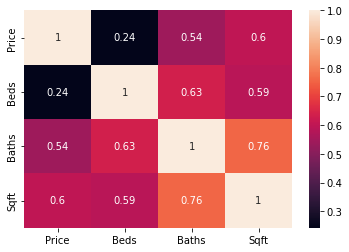

In [13]:
#showing numeric correlations only. Strongest correlation amongst numeric values is between sqft and price. Not surprising.
#It is interesting that there is a much stronger correlation between price - baths then price - beds. 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)